In [1]:
import pandas as pd
import numpy as np
import math
import os
from test_class import Test
os.environ['PYTHONHASHSEED'] = str(50)
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
def bin_append(set_ree, count, pset_size):
    intersect_val = 1
    subset = []

    while(intersect_val < pset_size):
        if count & intersect_val:
            index = int(math.log(intersect_val, 2))
            subset.append(set_ree[index])
        
        intersect_val *= 2

    return subset

def gen_power_set(set_ree):
    power = []
    count = 0

    pset_size = int(2 ** len(set_ree))

    for i in range(pset_size):
        power.append(bin_append(set_ree, count, pset_size))
        count = count + 1

    power.sort(key = lambda x : len(x))
    return power

In [3]:
rounds = 50
dataset = pd.read_csv('RTT_data.csv')
data_args = {
    'data seed': 12,
    'distance clients': [0, 2, 3, 6],
    'distance augments': [0.5, 0.5, 0.5, 0.5],
    'tolerance': 5,
    'exclude dtypes': 'object',
    'drop labels': ['GroundTruthRange[m]'],
    'target labels': ['GroundTruthRange[m]'],
    'test size 1': 0.2,
    'test size 2': 0.25,
    'normalize': True,
    'client num': 10
}

Mt = (np.ones(rounds) * 5).astype('int32')
model_seed = 50
test = Test(dataset, data_args, Mt, model_seed)

In [4]:
test.split(scheme = 1)
test.display_metadata()

Number of samples: 29581
Features per sample: 10

Columns:
%Timestamp[s], GroundTruthPositionX[m], GroundTruthPositionY[m], GroundTruthPositionZ[m], ML_range_estimate[m], AP_positionX[m], AP_positionY[m], AP_positionZ[m], AP_index, ToD_factor[m]

Clients: 10
Total Client Training Samples: 23664 (80.00%)
Total Client Training Labels: 23664
Total Test Samples: 5917 (20.00%)
Total Test Labels: 5917


In [5]:
test.display_client_distribution()

Data Distribution
Client 1: 1.45%
Client 2: 1.88%
Client 3: 12.08%
Client 4: 10.92%
Client 5: 27.04%
Client 6: 20.63%
Client 7: 16.07%
Client 8: 1.80%
Client 9: 3.82%
Client 10: 4.31%

Distance Distribution w.r.t. Max Distance
Client 1: 60.72%
Client 2: 38.94%
Client 3: 66.47%
Client 4: 80.69%
Client 5: 0.77%
Client 6: 48.34%
Client 7: 100.00%
Client 8: 1.76%
Client 9: 50.35%
Client 10: 7.22%


In [6]:
w, b, fedavg_test_mse, fedavg_log = test.run_fedavg_test(rounds = rounds, frac_clients = 0.5)
log_path = 'history/important baselines/fedavg_log_5_scheme1.npy'
test_path = 'history/important baselines/fedavg_test_mse_5_scheme1.npy'
np.save(log_path, fedavg_log)
np.save(test_path, fedavg_test_mse)
test.load_baseline_fedavg_data(test_path, log_path)

Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50


In [7]:
fedavg_avg_error = test.average_error((w, b))[0]

In [8]:
a_search = np.logspace(-3, 3, 7)
l_search = np.logspace(-3, 3, 7)
gs_wb_history = test.confeddi_gs(a_search, l_search, rounds = rounds, context = [0]) #before had no context set

Training Model 1
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 2
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 3
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 4
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 5
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 6
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 7
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 8
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 9
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 10
Round 5
Round 10
Ro

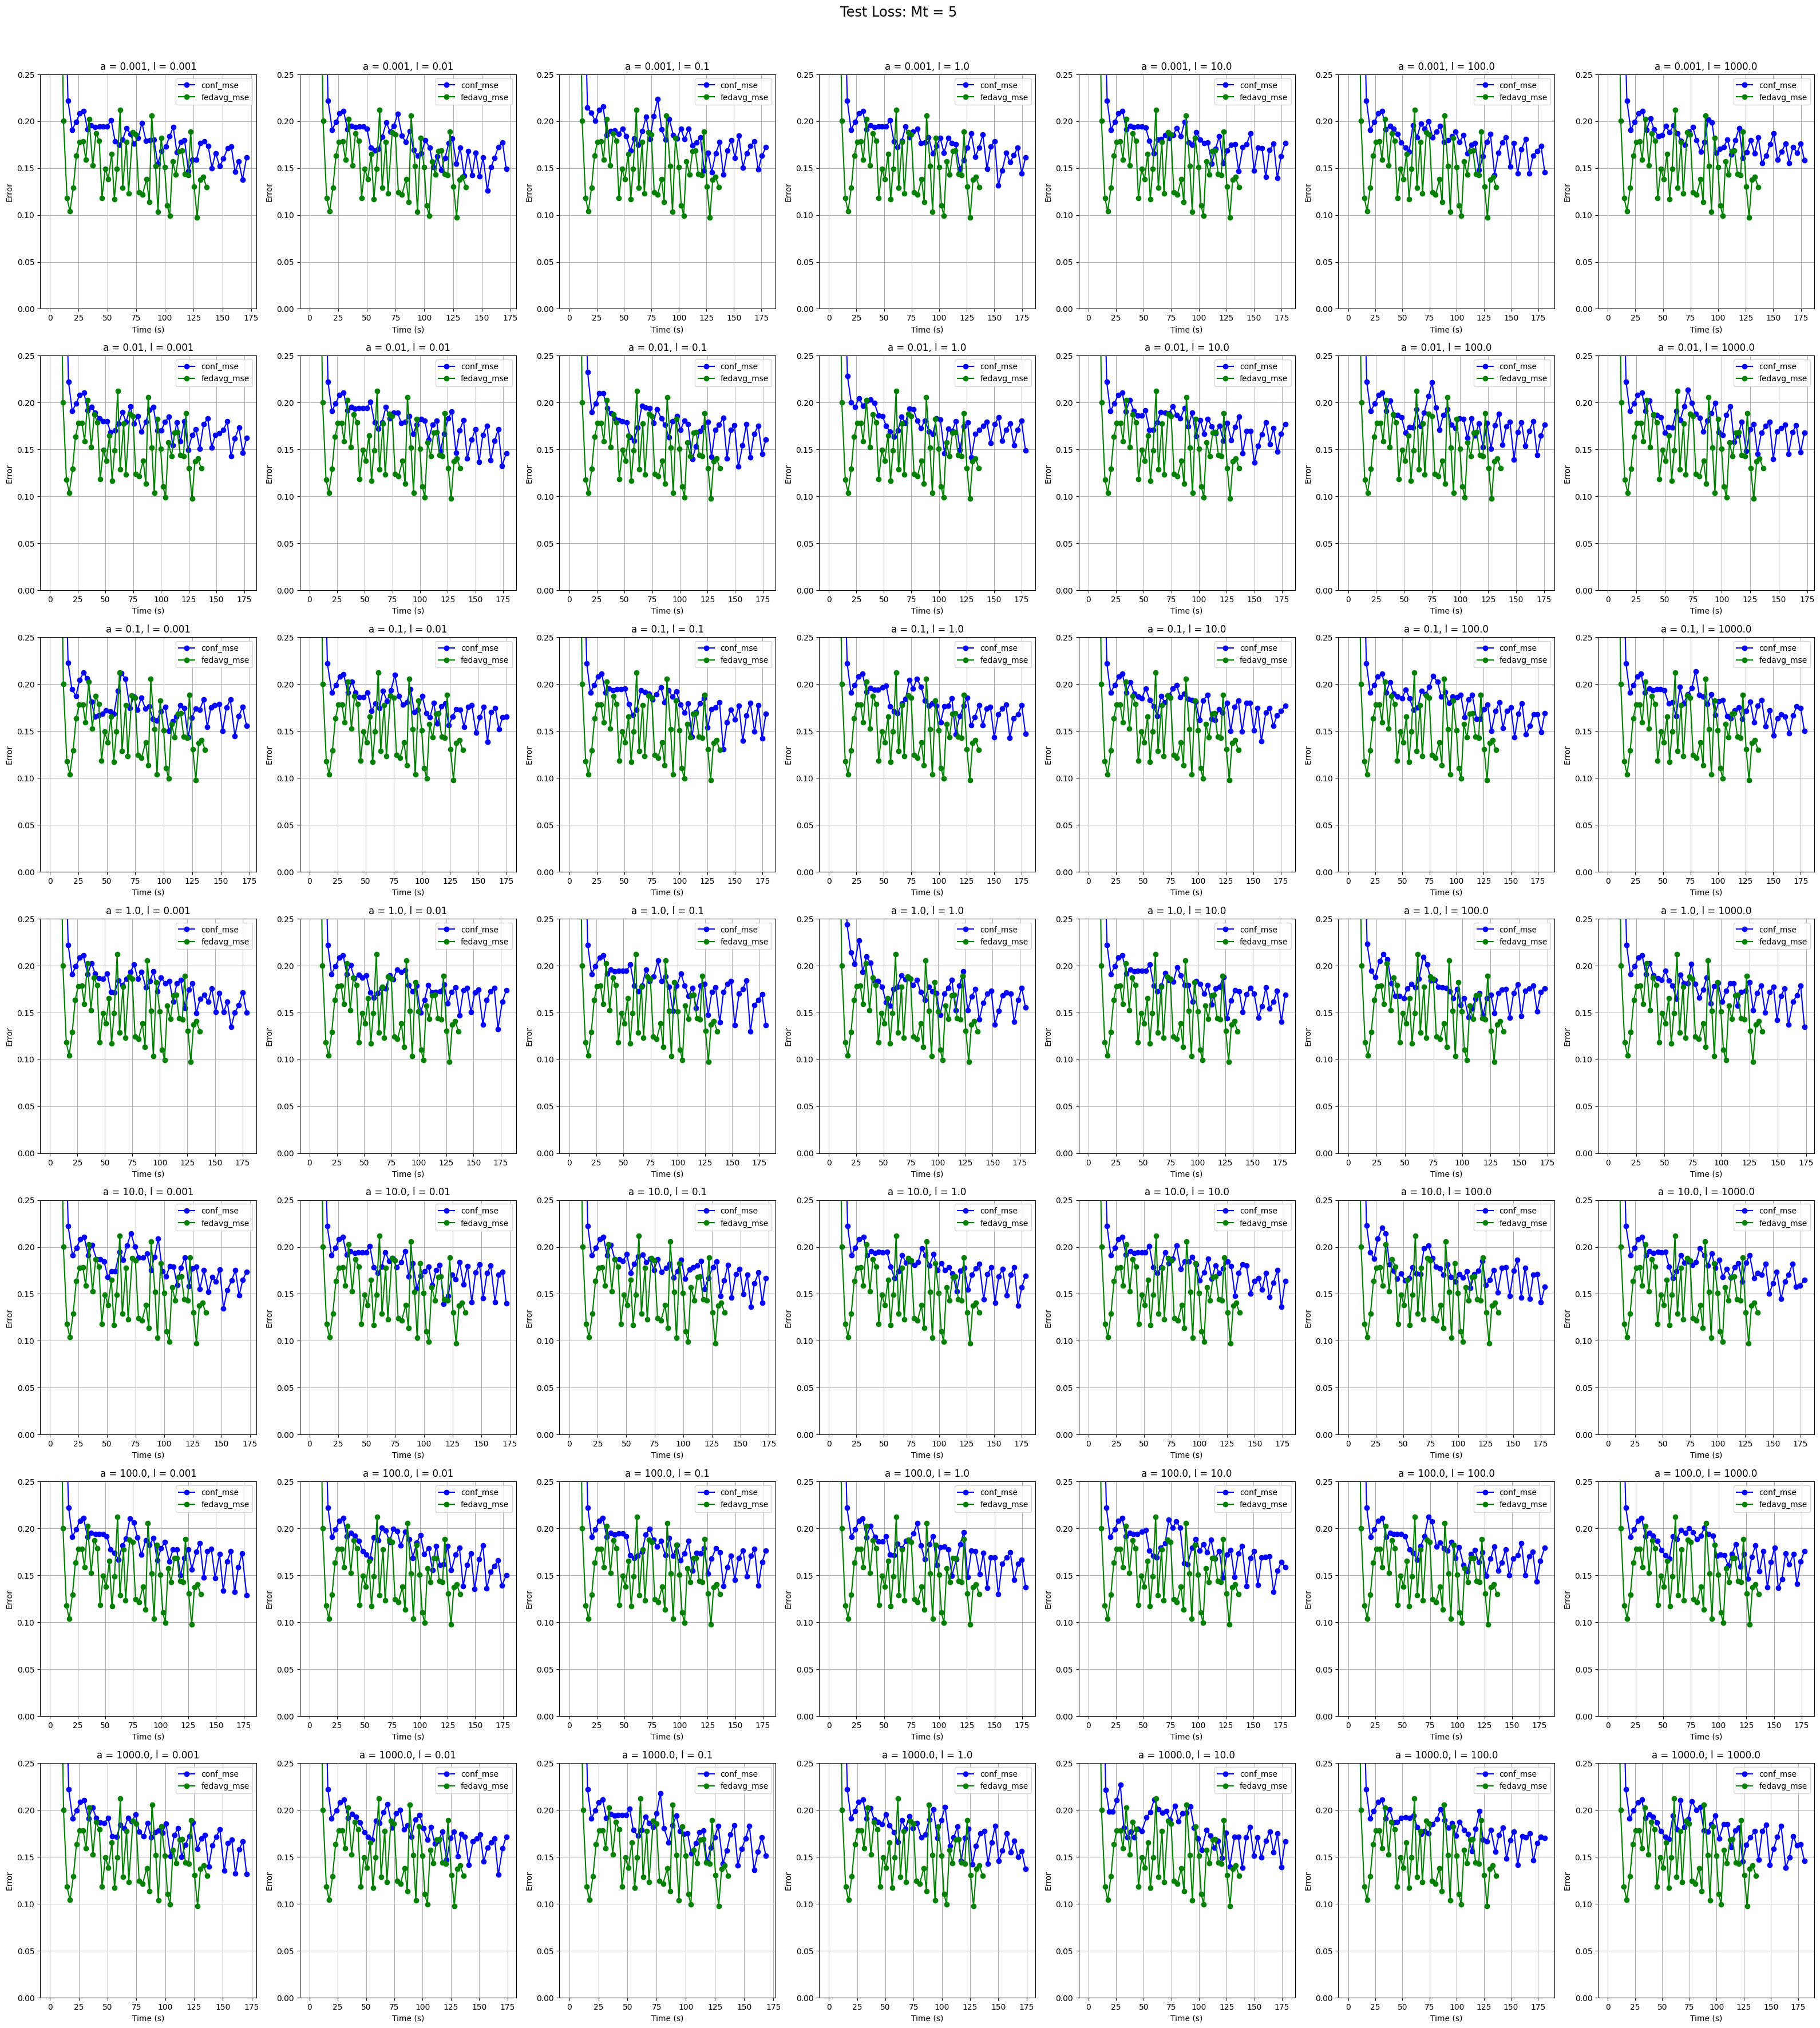

In [9]:
test.confeddi_gs_test_plots((40, 40), (0, 0.25))

In [10]:
for w, b in gs_wb_history.values():
    cond = test.average_error((w, b))[0] < fedavg_avg_error
    if cond:
        print(cond, end = ' ')
        print(np.absolute(test.average_error((w, b))[0] - fedavg_avg_error))
    else:
        print(cond)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [17]:
alpha = [0.01, 1000]
lmbda = [0.001, 1]
as_histories = []
wb_histories = []
context_combinations = [x for x in gen_power_set([0, 1, 2, 3]) if x != []]

In [18]:
for a, l in zip(alpha, lmbda):
    wb_history = test.confeddi_as(context_combinations, a, l, rounds = 50)
    as_histories.append(test.conf_as_history)
    wb_histories.append(wb_history)

Training Model 1
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 2
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 3
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 4
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 5
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 6
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 7
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 8
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 9
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 10
Round 5
Round 10
Ro

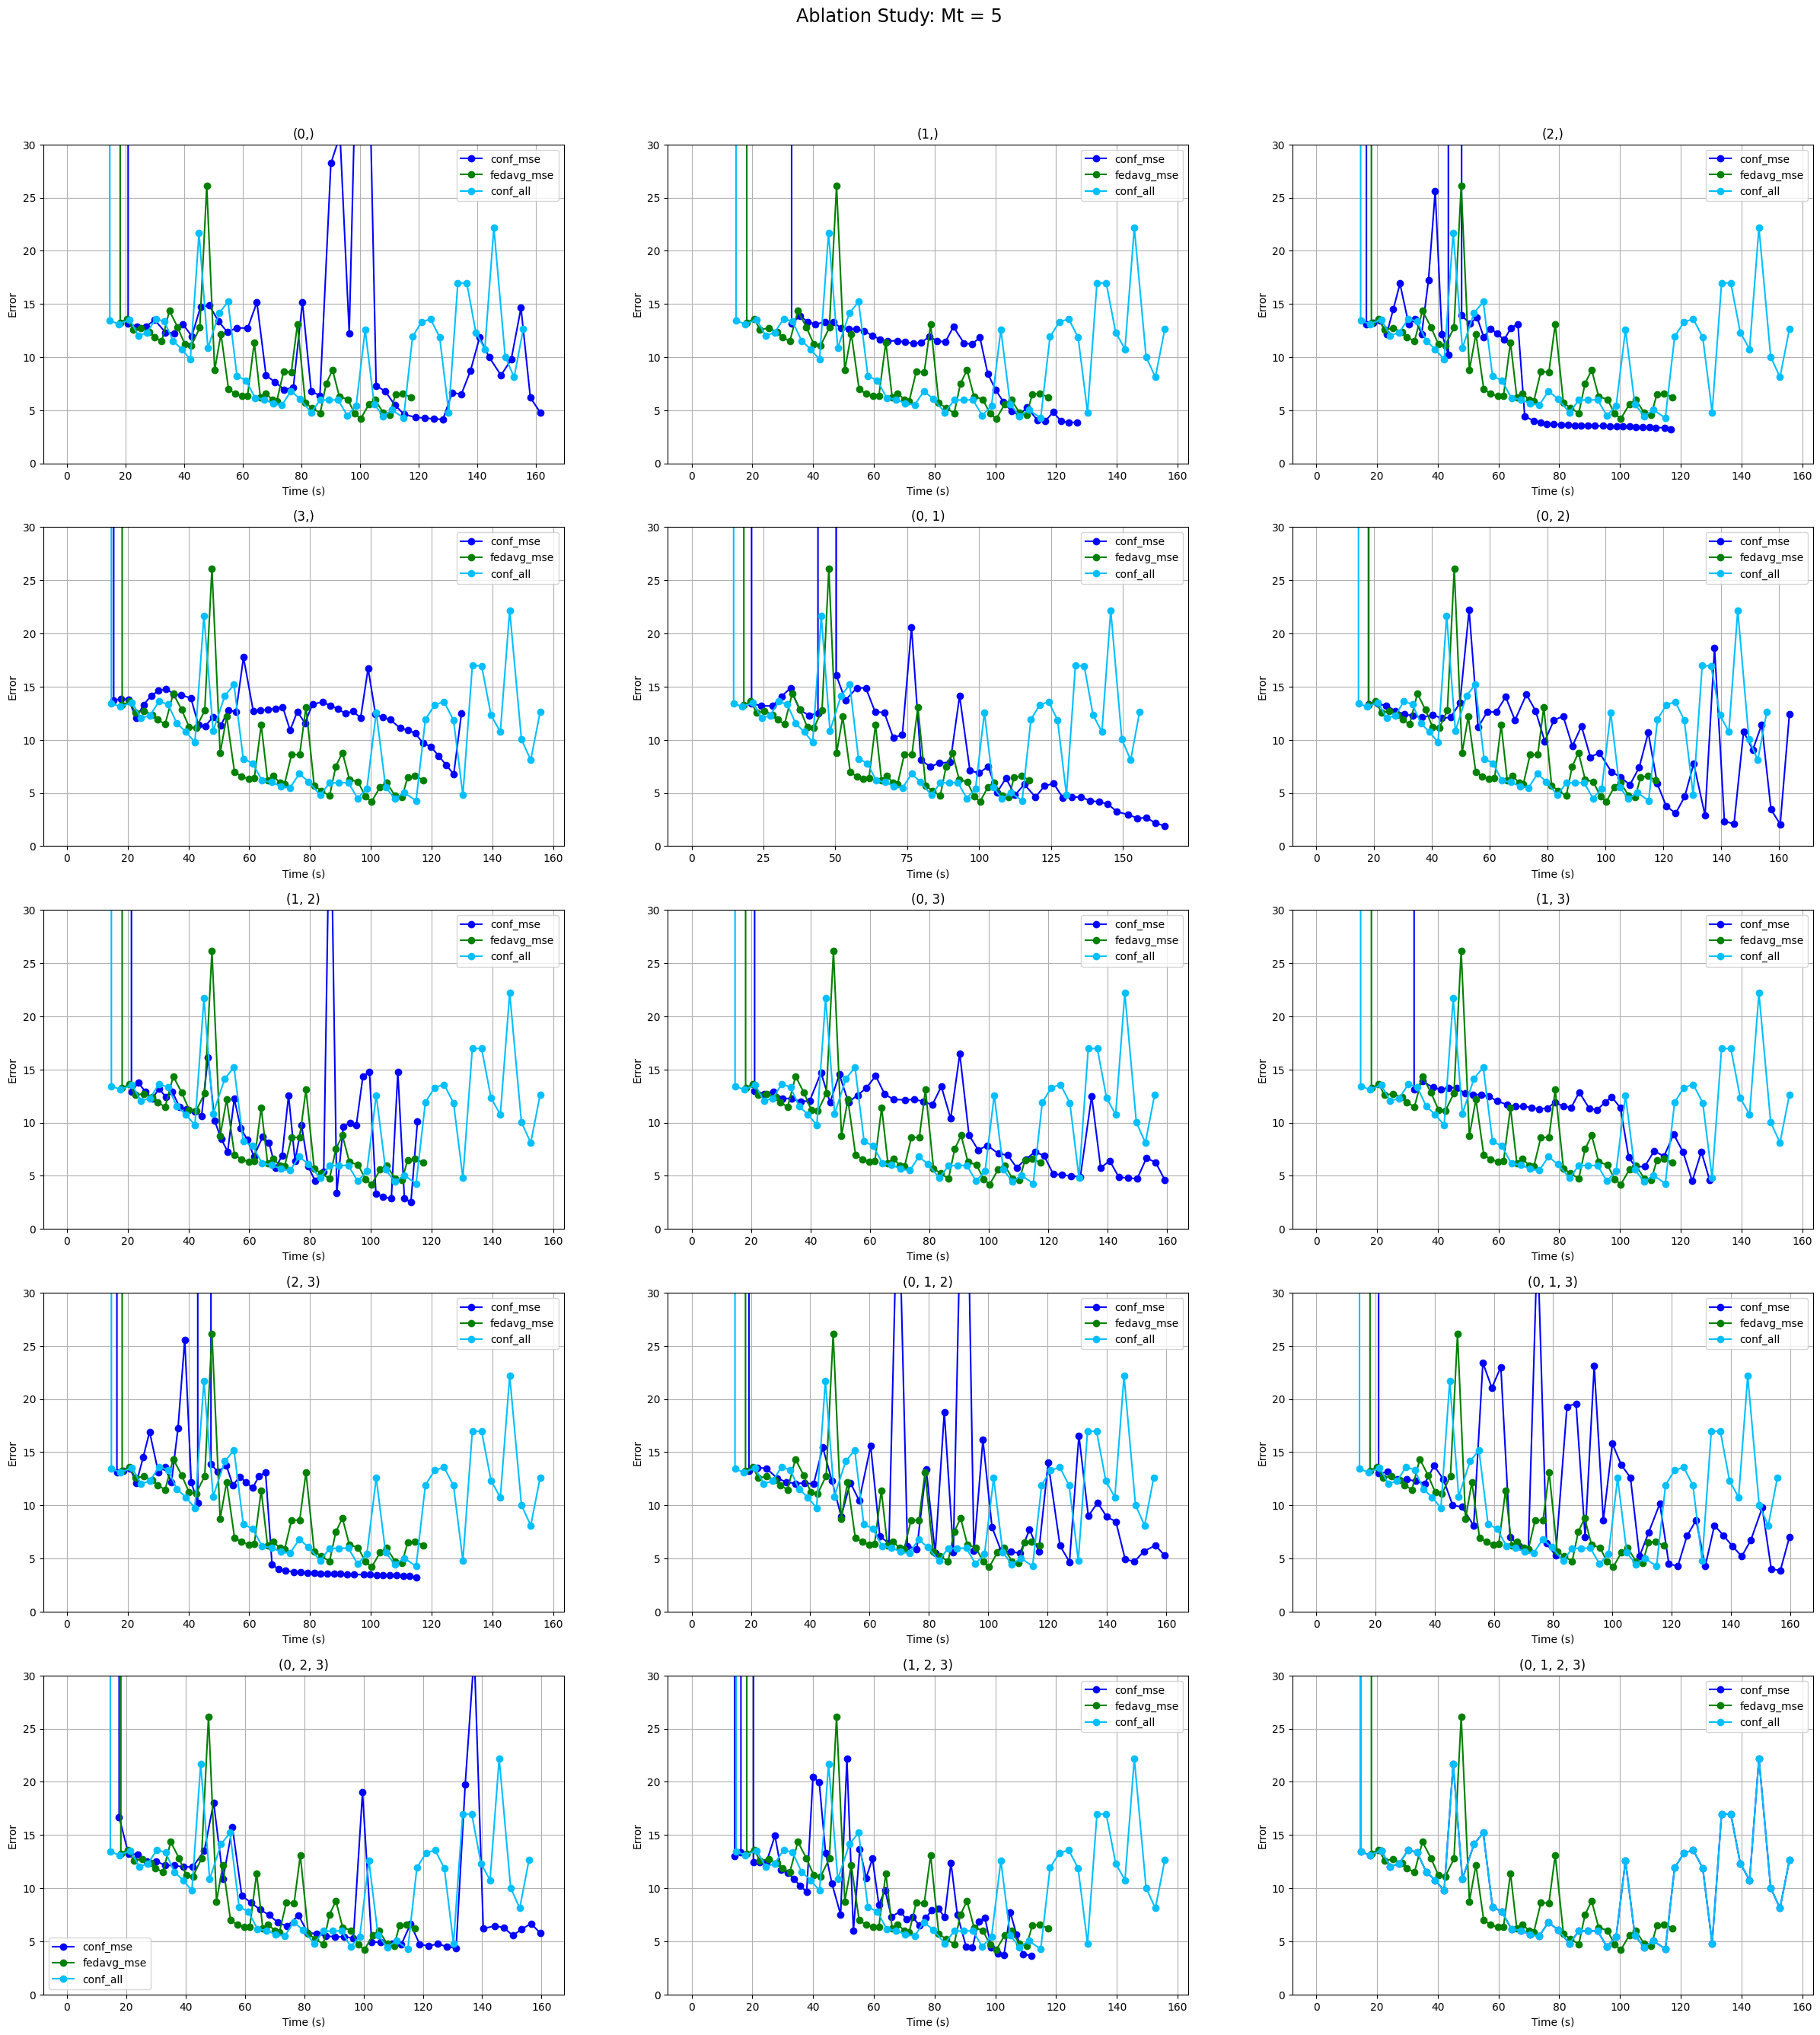

In [21]:
# a = .01, l = .001
test.conf_as_history = as_histories[0]
import matplotlib.pyplot as plt
#test.confeddi_as_test_plots((30, 30), (0, 30), 7, 5)
fig = plt.figure(figsize = (30, 30))
plt.suptitle(f'Ablation Study: Mt = {5}', fontsize = 'xx-large')
fig.tight_layout()
fig.subplots_adjust(top = 0.92)

plot = 1
for run in as_histories[0].items():
    context = run[0]
    err, time = run[1]
    fig.add_subplot(5, 3, plot)
    plt.plot(time, err, color = 'blue', label = 'conf_mse', marker = 'o')
    plt.plot(test.fedavg_log, test.fedavg_test_mse, color = 'green', label = 'fedavg_mse', marker = 'o')
    plt.plot(as_histories[0][(0, 1, 2, 3)][1], as_histories[0][(0, 1, 2, 3)][0], color = 'deepskyblue', label = 'conf_all', marker = 'o')

    plt.title(context)

    plt.ylim(0, 30)
    plt.ylabel('Error')
    plt.xlabel('Time (s)')
    plt.grid()
    plt.legend()
    plot += 1

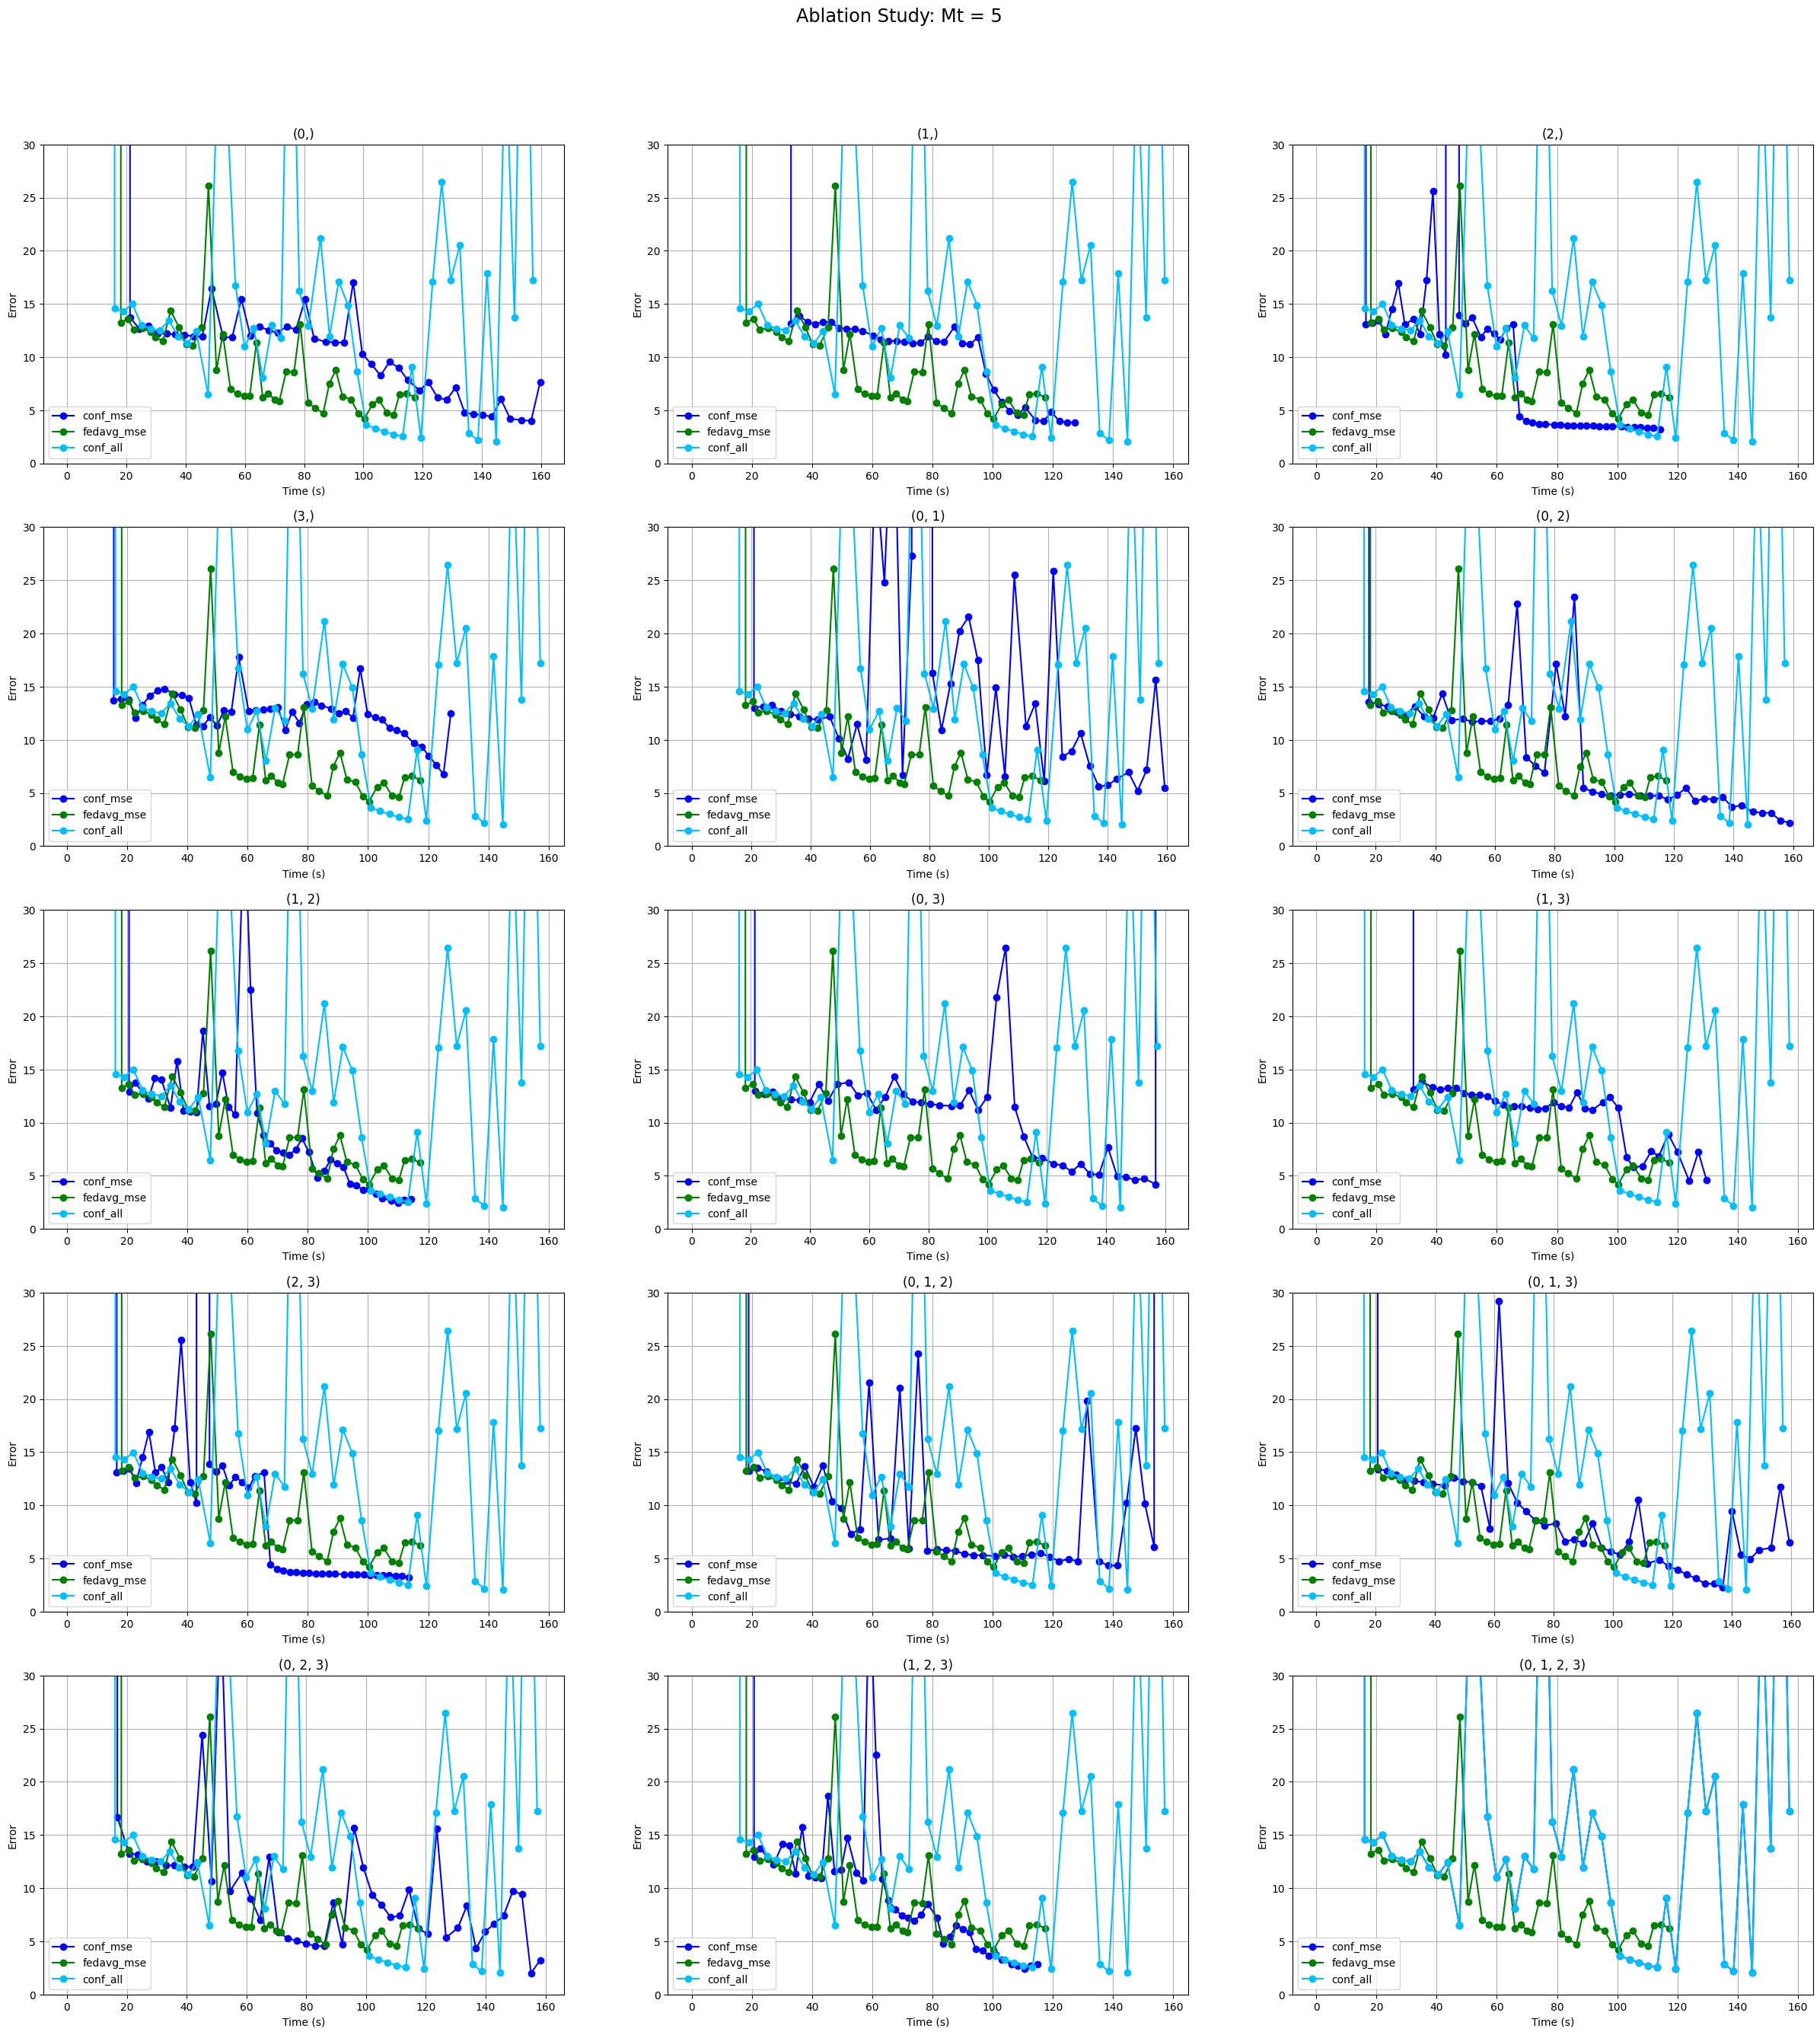

In [23]:
# a = 1000, l = 1
test.conf_as_history = as_histories[1]
fig = plt.figure(figsize = (30, 30))
plt.suptitle(f'Ablation Study: Mt = {5}', fontsize = 'xx-large')
fig.tight_layout()
fig.subplots_adjust(top = 0.92)

plot = 1
for run in as_histories[1].items():
    context = run[0]
    err, time = run[1]
    fig.add_subplot(5, 3, plot)
    plt.plot(time, err, color = 'blue', label = 'conf_mse', marker = 'o')
    plt.plot(test.fedavg_log, test.fedavg_test_mse, color = 'green', label = 'fedavg_mse', marker = 'o')
    plt.plot(as_histories[1][(0, 1, 2, 3)][1], as_histories[1][(0, 1, 2, 3)][0], color = 'deepskyblue', label = 'conf_all', marker = 'o')

    plt.title(context)

    plt.ylim(0, 30)
    plt.ylabel('Error')
    plt.xlabel('Time (s)')
    plt.grid()
    plt.legend()
    plot += 1